In [1]:
MAX_DEPTH = 4
MIN_SAMPLES = 50
CUTOFF = 3744

In [2]:
import json
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
with open('ten_min_high_freq_no_cheating.json', 'r', encoding='UTF-8') as f:
    first_data = json.load(f)

NEW_COL = ['name', 'code', 'time', 'price', 'time_1', 'price_1', 'price_dif_1',
       'sell_1', 'buy_1', 'volume_1', 'variation_1', 'post_num_1',
       'unique_id_1', 'click_1', 'like_1', 'dislike_1', 'time_2', 'price_2',
       'price_dif_2', 'sell_2', 'buy_2', 'volume_2', 'variation_2',
       'post_num_2', 'unique_id_2', 'click_2', 'like_2', 'dislike_2', 'time_3',
       'price_3', 'price_dif_3', 'sell_3', 'buy_3', 'volume_3', 'variation_3',
       'post_num_3', 'unique_id_3', 'click_3', 'like_3', 'dislike_3',
       'mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend', 'price_increase', 'did_price_increase']
df = pd.DataFrame(first_data, columns = NEW_COL)
df = df.dropna(axis=0, how='any')

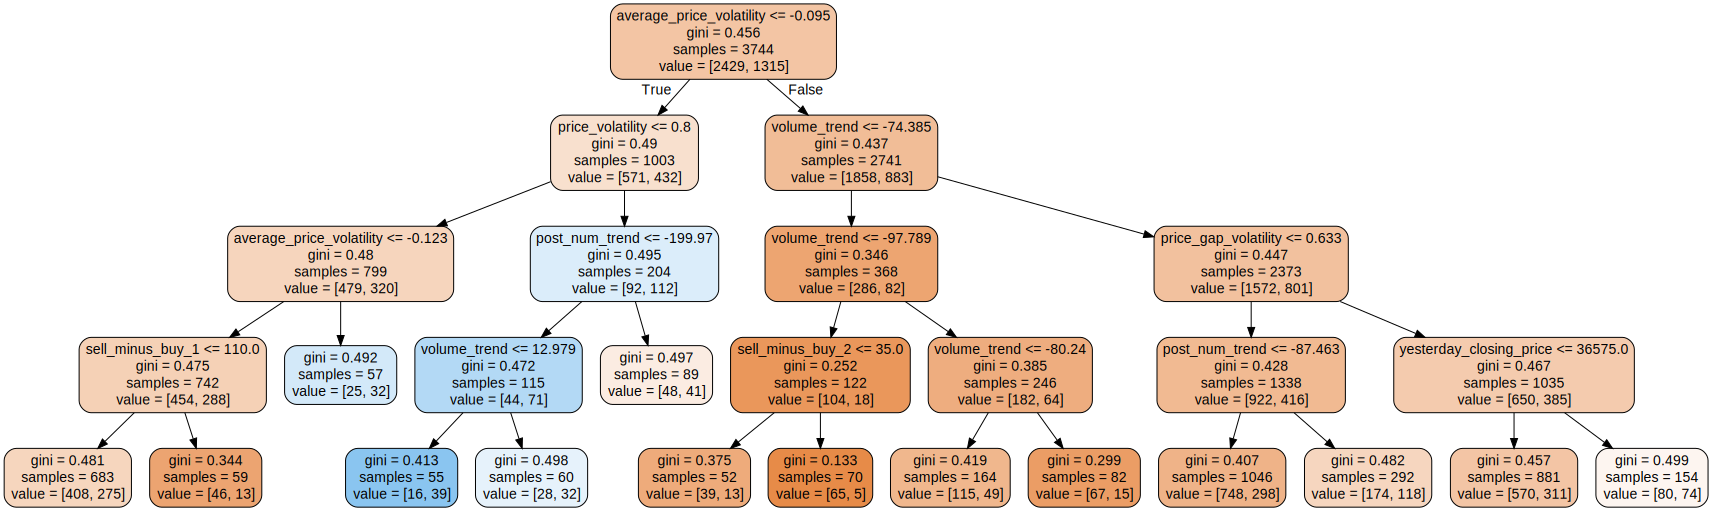

In [4]:
X_train = df[['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend']][:CUTOFF].as_matrix()

y_train = df[["did_price_increase"]][:CUTOFF].as_matrix()

X_test = df[['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend']][CUTOFF:].as_matrix()

y_test = df[["did_price_increase"]][CUTOFF:].as_matrix()

df_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, min_samples_leaf=MIN_SAMPLES)
df_tree.fit(X_train, y_train)

df_tree_viz = export_graphviz(
    df_tree,
    out_file=None,
    feature_names=['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend'],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(df_tree_viz)
#graph.render('df_tree_viz')
graph

In [5]:
y_pred = df_tree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)

MSE: 0.336986724298


In [6]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
compare = pd.concat([y_pred_df, y_test_df], axis=1)
compare.columns = ["y_pred", "y_test"]

In [7]:
df["did_price_increase"].mean()

0.339268244961847

In [8]:
df[(df["average_price_volatility"] <= -0.095) & (df["price_volatility"] > 0.8) \
   & (df["post_num_trend"] <= -199.97)]["did_price_increase"].mean()

0.5703971119133574

In [9]:
df[(((df["time"].str.startswith("2018-02-21"))) | (df["time"].str.startswith("2018-02-22")) \
    | (df["time"].str.startswith("2018-02-23"))) & (df["average_price_volatility"] <= -0.093) \
   & (df["price_volatility"] > 0.801) & (df["post_num_trend"] <= -141.671)]["did_price_increase"].mean()

0.5357142857142857